In [1]:
import tensorflow as tf

from keras.models import load_model
import tensorly as tl
from VBMF import VBMF
from tensorflow.python.client import device_lib
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Lambda, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization

from keras import backend as K
from keras.engine.topology import Layer
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import load_model

import importlib

from tensorly.tucker_tensor import tucker_to_tensor
import numpy as np
from matplotlib import pyplot as plt


from tensorly.decomposition import partial_tucker

def decompose(rank1, rank2, convlayer):
    core, factors = partial_tucker(convlayer, \
            modes=[2,3], ranks=[rank1,rank2], init='svd')
    return core, factors
    

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='b')
c = tf.add(a, b)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    print (sess.run(c))

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.
Using numpy backend.


['/device:GPU:0']
[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [2]:
from tensorly.decomposition import tucker

Using numpy backend.


In [3]:


# importlib.import_module('utils')

# import utils


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
X_train /= 255
X_test /= 255
X_train=2*X_train-1
X_test=2*X_test-1

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

batch_size=100
lr=0.001
Training=True
Compressing=False

def get_model():
	batch_norm_alpha=0.9
	batch_norm_eps=1e-4

	model=Sequential()

	model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid',input_shape=[32,32,3]))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	#model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Flatten())

	model.add(Dense(512))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Dense(512))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Dense(10))
	model.add(Activation('softmax'))

	return model


"""
model=get_model()
opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)#SGD(lr=lr,momentum=0.9,decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
weights_path='pretrained_cifar10.h5'
cback=keras.callbacks.ModelCheckpoint(weights_path, monitor='val_acc', save_best_only=True)
datagen = ImageDataGenerator(
	width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
	height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
	horizontal_flip=True)  # randomly flip images
model.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size),steps_per_epoch=X_train.shape[0]/batch_size,nb_epoch=100,validation_data=(X_test, y_test),verbose=2,callbacks=[cback])
"""





X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


"\nmodel=get_model()\nopt = keras.optimizers.Adam(lr=0.001,decay=1e-6)#SGD(lr=lr,momentum=0.9,decay=1e-5)\nmodel.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])\nweights_path='pretrained_cifar10.h5'\ncback=keras.callbacks.ModelCheckpoint(weights_path, monitor='val_acc', save_best_only=True)\ndatagen = ImageDataGenerator(\n\twidth_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)\n\theight_shift_range=0.15,  # randomly shift images vertically (fraction of total height)\n\thorizontal_flip=True)  # randomly flip images\nmodel.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size),steps_per_epoch=X_train.shape[0]/batch_size,nb_epoch=100,validation_data=(X_test, y_test),verbose=2,callbacks=[cback])\n"

In [4]:


old_model=get_model()
weights_path='pretrained_cifar10.h5'
old_model.load_weights(weights_path)

In [5]:
convlayer2 = old_model.layers[3].get_weights()[0]

In [ ]:




#a, b =decompose(1,64,convlayer2)


In [ ]:
len(error_list)

In [14]:

from tensorly.decomposition import tucker

def decompose(rank1, rank2, convlayer):
    core, factors = tucker(convlayer, \
            ranks=[3,3,rank1,rank2])
    return core, factors
    
error_list = []
for i in range(1,64):
    print(i)
    a, b =decompose(i,64,convlayer2)
    reconstructed = tucker_to_tensor(a,b, skip_factor=[2,3])
    recon_error = np.linalg.norm(reconstructed-convlayer2)
    error_list.append(recon_error)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


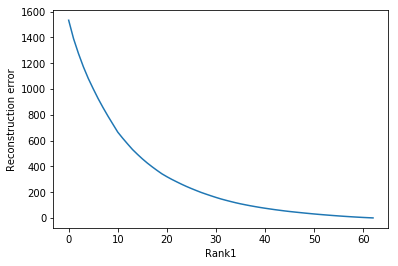

In [17]:
error_list = [x**2 for x in error_list]
plt.plot(error_list)
plt.xlabel('Rank1')
plt.ylabel('Reconstruction error')
plt.show()

In [10]:
from tensorly.decomposition import tucker

def decompose(rank1, rank2, convlayer):
    core, factors = tucker(convlayer, \
            ranks=[3,3,rank1,rank2])
    return core, factors

error_list_rank2 = []
for i in range(1,64):
    print(i)
    a, b =decompose(64,i,convlayer2)
    reconstructed = tucker_to_tensor(a,b)
    recon_error = np.linalg.norm(reconstructed-convlayer2)
    error_list_rank2.append(recon_error)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


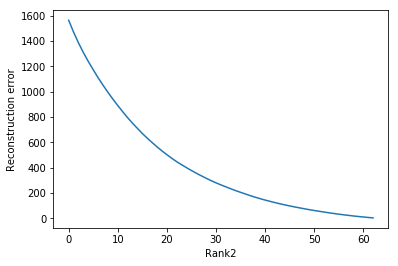

In [11]:
error_list_rank2 = [x**2 for x in error_list_rank2]
plt.plot(error_list_rank2)
plt.xlabel('Rank2')
plt.ylabel('Reconstruction error')
plt.show()

In [18]:
print(error_list)
print('**************************')
print(error_list_rank2)

[1533.0948108145967, 1389.672596499382, 1274.7877716022194, 1172.1230290553067, 1081.6617266556714, 1002.1058466812974, 926.0833580797189, 856.2816719110706, 790.5291471041892, 728.2098165975331, 666.2586689243653, 619.1759999497444, 574.7884795258287, 531.6452664472163, 494.5851819032723, 459.5336958030239, 427.1461680506036, 397.566350289595, 369.59345262192437, 342.98314023006606, 320.78852290654686, 300.1849959500978, 281.11713709222386, 262.5279707802147, 245.09158766785185, 228.9172209031276, 213.5802944822217, 198.68742166342508, 185.49327842750154, 172.6153764344199, 160.30153109942694, 148.64905930840996, 138.35821901915187, 128.5573656414781, 119.18250916453326, 110.67665003025559, 103.0152906153271, 95.66010976541384, 88.93145288866071, 82.45041660775678, 76.48269588212224, 70.92632398974183, 65.45776228743853, 60.51314955615658, 55.60791954934962, 51.162242065242026, 47.11802222393544, 43.20397736286759, 39.329111959276815, 35.63947415023199, 32.06307354752448, 28.711835928

In [ ]:
model.layers[0].get_weights()[0].shape

In [ ]:
[1564.894411825575, 1471.136715714878, 1385.8445052681636, 1309.2673638887354, 1238.9978909827769, 1174.253054227578, 1110.3642341683153, 1051.548802768244, 995.4708139314462, 941.9810331638473, 891.152679467632, 842.6448197110185, 795.224982675878, 751.7011872807379, 710.7447100240133, 670.120133893306, 633.5432102950435, 598.5638574493496, 564.5568261280459, 532.4837402812591, 502.92815469509515, 474.0741916371953, 447.4856354076801, 423.56104824983413, 400.15817298222464, 377.7774053148605, 356.20723343754435, 336.0458172616527, 316.5729042144958, 297.82662814381547, 280.3765290502961, 264.20124922414834, 248.7003740582295, 233.71384957601913, 218.86406290057585, 205.31760351568755, 192.03908358456465, 178.89113521612308, 166.61476502349615, 155.04205942758654, 144.24954344221987, 134.13273396874956, 124.33544339488526, 115.01759399127423, 106.12279512134046, 97.96262135064262, 90.13468613487566, 82.68553554209939, 75.3979270758, 68.2593059195824, 61.73142048250975, 55.476879940892104, 49.39492038024787, 43.586602304012786, 38.00949401274556, 32.55539792364311, 27.66496388267933, 22.883904202350095, 18.45512439786603, 14.246944834395038, 10.425801082878024, 6.679305429807357, 2.9990960061018654]


In [5]:



def get_new_model(ranks):
    batch_norm_alpha=0.9
    batch_norm_eps=1e-4

    model=Sequential()


    model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid',input_shape=[32,32,3]))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))

    model.add(Conv2D(filters=ranks[0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=64, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))


    model.add(Conv2D(filters=ranks[1], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[2], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=128, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))


    model.add(Conv2D(filters=ranks[2], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[3], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=128, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Conv2D(filters=ranks[3], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[4], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=256, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))

    model.add(Conv2D(filters=ranks[4], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[5], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=256, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    #model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model


In [6]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
X_train /= 255
X_test /= 255
X_train=2*X_train-1
X_test=2*X_test-1

In [11]:
from keras.models import load_model
layers = [64.0,64.0,128.0,128.0,256.0,256.0]
modified_layers = [3,9,14,20,25]
weights_path='pretrained_cifar10.h5'
old_model = load_model(weights_path)
accuracy_list = []
for i in range(3,5):
    ranks = [int((x//8)*i) for x in layers]
    new_model = get_new_model(ranks)
    j = 0
    count = 0
    while j < len(new_model.layers):
        print(j)
        if j in modified_layers:
            #print('h')
            cur_convlayer = old_model.layers[j-(count*2)].get_weights()[0]
            bias_convlayer = old_model.layers[j-(count*2)].get_weights()[1]
            #print('k')
            a, b =decompose(int(cur_convlayer.shape[-2]*(i/8)),int(cur_convlayer.shape[-1]*(i/8)),cur_convlayer)
            #print('l')
            new_model.layers[j].set_weights((np.expand_dims(np.expand_dims(b[0],0),0),np.zeros(b[0].shape[-1])))
            #print('m')
            new_model.layers[j+1].set_weights((a,np.zeros(a.shape[-1])))
            #print('n')
            new_model.layers[j+2].set_weights((np.expand_dims(np.expand_dims(np.transpose(b[1]),0),0),bias_convlayer))
            #print('o')
            j += 3
            count += 1
        else:
            new_model.layers[j].set_weights(old_model.layers[j-(count*2)].get_weights())
            j += 1
    opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)
    new_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    new_model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1)
    #make sure weights are loaded correctly:
    temp = new_model.evaluate(X_test,y_test,verbose=0)
    accuracy_list.append(temp)
    print('***************************')
    print(i,temp)
            
            

0
1
2
3
6
7
8
9
12
13
14
17
18
19
20
23
24
25
28
29
30
31
32
33
34
35
36
37
38


/datasets/home/66/966/vkamanur/.local/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
50000/50000 [==============================] - 47s - loss: 0.5401 - acc: 0.8279    
Epoch 2/10
50000/50000 [==============================] - 39s - loss: 0.4428 - acc: 0.8506    
Epoch 3/10
50000/50000 [==============================] - 40s - loss: 0.4009 - acc: 0.8630    
Epoch 4/10
50000/50000 [==============================] - 38s - loss: 0.3714 - acc: 0.8723    
Epoch 5/10
50000/50000 [==============================] - 38s - loss: 0.3347 - acc: 0.8842    
Epoch 6/10
50000/50000 [==============================] - 39s - loss: 0.3141 - acc: 0.8922    
Epoch 7/10
50000/50000 [==============================] - 39s - loss: 0.2866 - acc: 0.9006    
Epoch 8/10
50000/50000 [==============================] - 39s - loss: 0.2645 - acc: 0.9083    
Epoch 9/10
50000/50000 [==============================] - 38s - loss: 0.2567 - acc: 0.9109    
Epoch 10/10
50000/50000 [==============================] - 39s - loss: 0.2270 - acc: 0.9206    
***************************
3 [0.4501588683843612

In [13]:
accuracy_list_new = []
for i in range(6,8):
    ranks = [int((x//8)*i) for x in layers]
    new_model = get_new_model(ranks)
    j = 0
    count = 0
    while j < len(new_model.layers):
        print(j)
        if j in modified_layers:
            #print('h')
            cur_convlayer = old_model.layers[j-(count*2)].get_weights()[0]
            bias_convlayer = old_model.layers[j-(count*2)].get_weights()[1]
            #print('k')
            a, b =decompose(int(cur_convlayer.shape[-2]*(i/8)),int(cur_convlayer.shape[-1]*(i/8)),cur_convlayer)
            #print('l')
            new_model.layers[j].set_weights((np.expand_dims(np.expand_dims(b[0],0),0),np.zeros(b[0].shape[-1])))
            #print('m')
            new_model.layers[j+1].set_weights((a,np.zeros(a.shape[-1])))
            #print('n')
            new_model.layers[j+2].set_weights((np.expand_dims(np.expand_dims(np.transpose(b[1]),0),0),bias_convlayer))
            #print('o')
            j += 3
            count += 1
        else:
            new_model.layers[j].set_weights(old_model.layers[j-(count*2)].get_weights())
            j += 1
    opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)
    new_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    new_model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1)
    #make sure weights are loaded correctly:
    temp = new_model.evaluate(X_test,y_test,verbose=0)
    accuracy_list_new.append(temp)
    print('***************************')
    print(i,temp)
            
            

0
1
2
3
6
7
8
9
12
13
14
17
18
19
20
23
24
25
28
29
30
31
32
33
34
35
36
37
38


/datasets/home/66/966/vkamanur/.local/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
50000/50000 [==============================] - 39s - loss: 0.4258 - acc: 0.8620    
Epoch 2/10
50000/50000 [==============================] - 39s - loss: 0.3771 - acc: 0.8725    
Epoch 3/10
50000/50000 [==============================] - 38s - loss: 0.3439 - acc: 0.8815    
Epoch 4/10
50000/50000 [==============================] - 39s - loss: 0.3257 - acc: 0.8891    
Epoch 5/10
50000/50000 [==============================] - 41s - loss: 0.2929 - acc: 0.8991    
Epoch 6/10
50000/50000 [==============================] - 39s - loss: 0.2708 - acc: 0.9060    
Epoch 7/10
50000/50000 [==============================] - 40s - loss: 0.2501 - acc: 0.9132    
Epoch 8/10
50000/50000 [==============================] - 40s - loss: 0.2255 - acc: 0.9220    
Epoch 9/10
50000/50000 [==============================] - 37s - loss: 0.2102 - acc: 0.9265    
Epoch 10/10
50000/50000 [==============================] - 37s - loss: 0.1987 - acc: 0.9322    
***************************
6 [0.4466868371248245

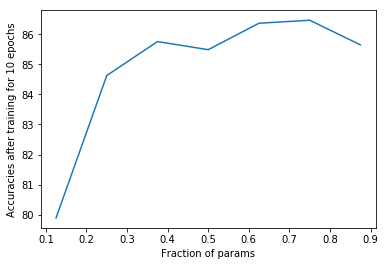

In [17]:
from matplotlib import pyplot as plt

ranks = [(1/8)*i for i in range(1,8)]
accuracy_list_total = [79.89, 84.63, 85.76,85.49,86.37,86.47,85.65]
plt.plot(ranks, accuracy_list_total)
plt.ylabel('Accuracies after training for 10 epochs')
plt.xlabel('Fraction of params')
plt.show()

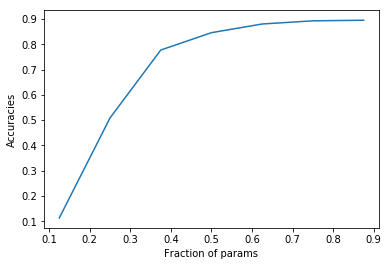

In [11]:
from matplotlib import pyplot as plt

ranks = [(1/8)*i for i in range(1,8)]
accuracies = [x[1] for x in accuracy_list]
plt.plot(ranks, accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Fraction of params')
plt.show()

In [12]:


def get_new_model(ranks):
    batch_norm_alpha=0.9
    batch_norm_eps=1e-4

    model=Sequential()


    model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid',input_shape=[32,32,3]))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))

    model.add(Conv2D(filters=ranks[0][0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[0][1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=64, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))


    model.add(Conv2D(filters=ranks[1][0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[1][1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=128, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))


    model.add(Conv2D(filters=ranks[2][0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[2][1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=128, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Conv2D(filters=ranks[3][0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[3][1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=256, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))

    model.add(Conv2D(filters=ranks[4][0], kernel_size=1, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=ranks[4][1], kernel_size=3, strides=(1, 1), padding='valid'))

    model.add(Conv2D(filters=256, kernel_size=1, strides=(1, 1), padding='valid'))

    #model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    #model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model


In [13]:


modified_layers = [3,9,14,20,25]

layers = []
j=0
count = 0
while j < 39:
    if j in modified_layers:
            #print('h')
            convlayer = old_model.layers[j-(count*2)].get_weights()[0]
            unfold_0 = tl.base.unfold(convlayer, 2) 
            unfold_1 = tl.base.unfold(convlayer, 3)
            _, diag_0, _, _ = VBMF.EVBMF(unfold_0)
            _, diag_1, _, _ = VBMF.EVBMF(unfold_1)
            print([diag_0.shape[0], diag_1.shape[1]])
            layers.append([diag_0.shape[0], diag_1.shape[1]])
            count += 1 
    j += 1

0.00976761960743774
0.020769131917805567
[31, 23]
0.016310746574950387
0.0241220658511931
[27, 30]
0.03319115536466812
0.03740107016174913
[20, 14]
0.02729999962579739
0.029680696744465464
[35, 38]
0.020923087477680482
0.01821309538778492
[56, 66]


In [14]:
# 0.00976761960743774
# 0.020769131917805567
# [31, 23]
# 0.016310746574950387
# 0.0241220658511931
# [27, 30]
# 0.03319115536466812
# 0.03740107016174913
# [20, 14]

accuracy_list_new = []

for i in range(1):
    #layers = [int((x//8)*i) for x in layers]
    new_model = get_new_model(layers)
    j = 0
    count = 0
    while j < len(new_model.layers):
        print(j)
        if j in modified_layers:
            #print('h')
            convlayer = old_model.layers[j-(count*2)].get_weights()[0]
    
            bias_convlayer = old_model.layers[j-(count*2)].get_weights()[1]
            #print('k')
            a, b =decompose(layers[count][0],layers[count][1],convlayer)
            #print('l')
            new_model.layers[j].set_weights((np.expand_dims(np.expand_dims(b[0],0),0),np.zeros(b[0].shape[-1])))
            #print('m')
            new_model.layers[j+1].set_weights((a,np.zeros(a.shape[-1])))
            #print('n')
            new_model.layers[j+2].set_weights((np.expand_dims(np.expand_dims(np.transpose(b[1]),0),0),bias_convlayer))
            #print('o')
            j += 3
            count += 1
        else:
            new_model.layers[j].set_weights(old_model.layers[j-(count*2)].get_weights())
            j += 1
    opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)
    new_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    for k in range(10):
        new_model.fit(X_train, y_train, batch_size=32, nb_epoch=1, verbose=1)
        #make sure weights are loaded correctly:
        temp = new_model.evaluate(X_test,y_test,verbose=0)
        accuracy_list_new.append(temp)
        print('***************************')
        print(i,temp)
            
            

# from keras.models import load_model
# import tensorly as tl

# model=get_model()
# weights_path='pretrained_cifar10.h5'
# model.load_weights(weights_path)

# layers = [3,7,10,14,17]

# for i in layers:
#     convlayer = model.layers[i].get_weights()[0]
#     unfold_0 = tl.base.unfold(convlayer, 2) 
#     unfold_1 = tl.base.unfold(convlayer, 3)
#     _, diag_0, _, _ = VBMF.EVBMF(unfold_0)
#     _, diag_1, _, _ = VBMF.EVBMF(unfold_1)
#     ranks = [diag_0.shape[0], diag_1.shape[1]]
#     print(ranks)

# convlayer3 = model.layers[7].get_weights()[0].shape
# convlayer4 = model.layers[10].get_weights()[0].shape
# convlayer5 = model.layers[14].get_weights()[0].shape
# convlayer6 = model.layers[17].get_weights()[0].shape
# print(convlayer2, convlayer3, convlayer4, convlayer5, convlayer6)

0
1
2
3
6
7
8
9
12
13
14
17
18
19
20
23
24
25
28
29
30
31
32
33
34
35
36
37
38


/datasets/home/66/966/vkamanur/.local/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
50000/50000 [==============================] - 43s - loss: 0.8045 - acc: 0.7486    
***************************
0 [0.6208955781936646, 0.7875]
Epoch 1/1
50000/50000 [==============================] - 40s - loss: 0.5812 - acc: 0.8025    
***************************
0 [0.5691111742496491, 0.809]
Epoch 1/1
50000/50000 [==============================] - 39s - loss: 0.5388 - acc: 0.8169    
***************************
0 [0.6033426920413971, 0.7963]
Epoch 1/1
50000/50000 [==============================] - 40s - loss: 0.5005 - acc: 0.8302    
***************************
0 [0.5898922859191894, 0.8045]
Epoch 1/1
50000/50000 [==============================] - 40s - loss: 0.4777 - acc: 0.8372    
***************************
0 [0.5852627241134644, 0.8068]
Epoch 1/1
50000/50000 [==============================] - 39s - loss: 0.4459 - acc: 0.8480    
***************************
0 [0.54182347240448, 0.8182]
Epoch 1/1
50000/50000 [==============================] - 39s - loss: 0.4167 - acc: 0.

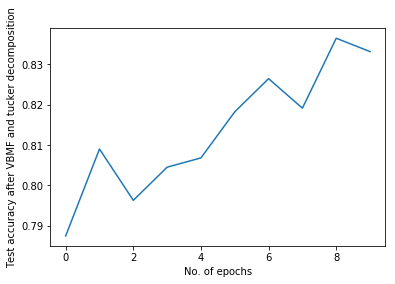

In [16]:
from matplotlib import pyplot as plt

accuracy_list_test = [x[1] for x in accuracy_list_new]
plt.plot(accuracy_list_test)
plt.ylabel('Test accuracy after VBMF and tucker decomposition')
plt.xlabel('No. of epochs')
plt.show()

In [32]:
a, diag_0, b, c = VBMF.VBMF(unfold_0,10)


Estimated sigma2:  0.017282053994563836


In [33]:
print(diag_0.shape)
print(a.shape)
print(b.shape)
#print(c)

(160, 160)
(256, 160)
(2304, 160)
